# Proyecto muestra aprendizaje n° 1: galaxias, sus colores, y su distribución en el espacio
---
En este taller trabajaremos utilizando un catálogo de galaxias que tiene información de su posición en el cielo, su magnitud (que tan brillante es) en cinco filtros distintos, y su redshift o corrimiento hacia el rojo. Recordemos los conceptos básicos que nos ayudarán a entender las cantidades de cada columna:

   - **ra, dec**: posición en el cielo de las galaxias, en un sistema de coordenadas análogo al de latitud y longitud sobre la Tierra.
   
   - **u, g, r, i, z**: sistema de filtros usado por el Sloan Digital Sky Survey, que capturan luz de distintas regiones del espectro electromagnético como se muestra en el diagrama de abajo. La curva para cada filtro muestra su eficiencia en función de la longitud de onda. Dos magnitudes se pueden restar una de la otra para formar un color, como, por ejemplo, **g-r**. Por los general los colores se calculan con dos magnitudes contiguas y siguiendo el orden: u-g, g-r, etc. El valor de un color está relacionado con el color que nosotros vemos: a menor número, más azul.
   <img src="http://www.astroml.org/_images/plot_sdss_filters_1.png",width=600,height=600>
   
   - **redshift**: corrimiento hacia el rojo por efecto Doppler, medido con el espectro la mayoría de las veces.
   
Es importante recordar que el redshift entrega información de la velocidad con la que se mueve la galaxia con respecto a nosotros en la línea de visión, y, por Ley de Hubble, se puede transformar a distancia. La velocidad se obtiene usando la ecuación $ v = cz $ (taller 8), donde $v$ es la velocidad de la galaxia, $c$ es la velocidad de la luz (300000 km/s), y $z$ es el redshift observado. Una vez obtenida la velocidad, utilizamos la forma matemática de la Ley de Hubble, $v=H_0*d$, donde $H_0\approx70$ km/(s\*Mpc) es la constante de Hubble, y 1 Mpc = $10^6$ pc $\approx3*10^{22}$ m.

---
### Objetivos del proyecto:

Esperamos que con este proyecto tanto los alumnos como los espectadores comprendan la distribución de las estrellas en el espacio, y cómo varía esta distribución si es que cambiamos las propiedades fundamentales de las galaxias. Para esto, se espera que se desarrollen las líneas de investigación descritas más abajo

---

# Posibles líneas de desarrollo de este taller:

   ## 1. Distribución de color y magnitud de galaxias observadas
   ¿Hay más galaxias rojas que azules? ¿más galaxias brillantes que débiles? ¿cuáles son los colores y las magnitudes promedio y sus desviaciones estándar?(referencia: talleres 3 & 5)
   ## 2. Diagramas color-magnitud y color-color de galaxias
   ¿Hay relaciones entre estas cantidades? Las galaxias más brillantes, ¿son más azules o más rojas? (referencia: taller 3)
   ## 3. Distribución de redshift y distancia de galaxias observadas 
   ¿Hay más galaxias más cerca o más lejos? ¿cuál es su distancia promedio y la desviación estándar? (referencia: taller 3 & 5)
   ## 4. Distribuciones de color, magnitud, diagramas color-color y color-magnitud para distintos intervalos de redshift
   ¿Cambian las condiciones de las galaxias si es que están más cerca o más lejos? (referencia: taller 8)
   ## 5. Distribución 3D de las galaxias, estudiada con mapas del cielo para distintos intervalos de redshift/distancia
   ¿Cambia su distribución en el cielo?; (referencia: taller 8)
   ## 6. Distribución 3D de las galaxias en distintos intervalos de color o magnitud
   ¿Cambian la distribución en el cielo para distintos intervalos de color?; (referencia: taller 8)
   ## 7. Mostrar imágenes y espectros de galaxias que use
   ¿Cómo parece visualmente que varían las imágenes y los espectros de las galaxias si cambia el redshift, la magnitud, y el color de éstas? (referencia: taller 9 & 10)
   ## 8. Cualquier otra relación/pregunta que se les ocurra

---
   
Su grupo deberá entregar semana a semana un archivo donde muestre su progreso. Esperamos que estos archivos **no muestren sólo código**, sino que también expliquen con celdas de texto qué es lo que hace el código y la razón física detrás de las relaciones, distribuciones, y números que muestre. Recuerde que este trabajo puede ser expuesto en la muestra de aprendizaje, donde tendrá que mostrarlo a personas que puede que no tengan conocimiento de astronomía o programación.

Para entregar el archivo, utilizaremos el sistema de Dropbox que hemos usado en los otros talleres evaluados. Para eso, es fundamental que ingrese en la celda de abajo los nombres de los integrantes del grupo, y al final, luego de guardar, ejecute las dos últimas celdas.


In [37]:
integrante1 = 'Catalina Munoz'
integrante2 = 'Diego Retamales'
integrante3 = 'Valeska Vizcardo'

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
from sdss_tools import sdss_jpg, sdss_fits, sdss_spectra, sdss_template

from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astroquery.sdss import SDSS

rc('font', size=14)
rc('axes', labelsize=22)
%matplotlib inline

C:\Anaconda2\lib\site-packages\astroquery\sdss\__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


La siguiente celda de código carga el catálogo que usted usará en este proyecto

In [3]:
data=pd.read_csv('SDSSspecgalsDR8.csv')
data.head()

,ra,dec,redshift,u,g,r,i,z
0,146.714191,-1.041276,0.021222,17.150417,15.497092,14.674012,14.234288,13.907544
1,146.744142,-0.652220,0.203783,21.334766,19.131100,17.710718,17.149128,16.756086
2,146.628573,-0.765147,0.064656,19.509130,17.592752,16.673574,16.205244,15.837440
3,146.631673,-0.988261,0.052654,19.489283,18.323746,17.839603,17.526131,17.422728
4,146.919416,-0.990517,0.213861,20.432014,18.648922,17.465515,16.998659,16.670509


**Parte 1**

In [4]:
len(data)

661598

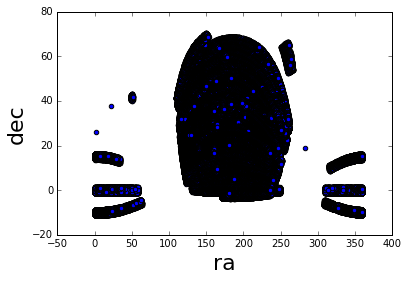

In [15]:
data.plot.scatter(x='ra',y='dec')

In [28]:
g = data['g']
r = data['r']
print np.mean(g-r)

0.87991311269


In [29]:
u = data['u']
g = data['g']
print np.mean(u-g)

1.68387589644


In [30]:
r = data['r']
i = data['i']
print np.mean(r-i)

0.417554304692


In [31]:
i = data['i']
z = data['z']
print np.mean(i-z)

0.300008309814


In [32]:
#Calculamos los colores utilizando dos magnitudes contiguas. A menor número el color será más azul y siendo mayor, este será rojo.
#Dentro del catálogo, encontramos mayor cantidad de galaxias azules.

In [34]:
total = 0.0
for i in range(len(data)):
    total=total+data[i]
    print total
promedio = total/len(data)
print promedio

KeyError: 0

**Parte 2**

**Parte 3**

**Parte 4**

**Parte 5**

**Parte 6**

**Parte 7**

**Extras**

# Una vez terminada la sesion del taller, debera ejecutar las siguientes dos celdas para subir su trabajo al servidor donde quedara almacenada

In [40]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "notebook_file = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display,Javascript,HTML
import dropbox
import socket
import string

# Get the hostname
hostname=string.split(socket.gethostname(),'.')[0]

# Save the notebook
display(Javascript('IPython.notebook.save_checkpoint();'))

try:
    integrante_exist= (integrante1 != '' and integrante2!= '')
except NameError:
    display(HTML("<big><b><br>Los nombres de los integrantes no estan definidos. Revise la primera celda y escriba los nombres.</b></big>"))
else:
    if integrante_exist:
        output_file='/'+notebook_file+'_'+hostname+'_'+integrante1+'_'+integrante2+'_'+integrante3+'.ipynb'
        
        display(HTML("<big><b><br>Nombres de los integrantes:</b></big>"))
        display(HTML("<big>{}<br>{}</big>".format(integrante1,integrante2,integrante3)))
        display(HTML("<big><b><br>Nombre del archivo:</b></big>"))
        display(HTML("<big>{}</big>".format(output_file)))

        client=dropbox.client.DropboxClient('q96bL4l9oyAAAAAAAAAACEK7gCFwoO-PtZu5jJ6gynNwriiBjzTLsN0eV51YQhNe')

        f = open(notebook_file+'.ipynb', 'rb')
        response = client.put_file(output_file,f)
        f.close()
        display(HTML("<big><b><br>Registro del servidor de Dropbox:</b></big>"))
        print response
    else:
        display(HTML("<big><b><br>Los nombres de los integrantes no estan definidos. Revise la primera celda y escriba los nombres.</b></big>"))

<IPython.core.display.Javascript object>